In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn model delection
from sklearn.model_selection import RandomizedSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LinearRegression



# 1.Read the Data 

In [2]:
df=pd.read_excel('kc-house-data-mini.xlsx')

# 2.Summarize the important observations from the dataset

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2068000270,20140805T000000,1400000,5,3.0,3850,14990,1.0,0,0,...,9,2290,1560,1964,0,98004,47.6425,-122.218,3010,15001
1,7732500700,20141126T000000,832500,4,2.5,3450,35100,2.0,0,0,...,10,3450,0,1987,0,98052,47.7302,-122.106,3110,35894
2,7851990240,20140717T000000,771150,4,3.5,3950,12320,2.0,0,0,...,10,3950,0,2001,0,98065,47.5414,-121.869,3920,11086
3,3423049269,20140513T000000,225000,4,1.5,1950,12559,1.5,0,0,...,6,1950,0,1939,0,98188,47.4364,-122.282,1950,9178
4,7852150200,20140923T000000,389950,3,2.5,1700,6396,2.0,0,0,...,7,1700,0,2003,0,98065,47.5333,-121.870,1700,4444


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 21 columns):
id               2001 non-null int64
date             2001 non-null object
price            2001 non-null int64
bedrooms         2001 non-null int64
bathrooms        2001 non-null float64
sqft_living      2001 non-null int64
sqft_lot         2001 non-null int64
floors           2001 non-null float64
waterfront       2001 non-null int64
view             2001 non-null int64
condition        2001 non-null int64
grade            2001 non-null int64
sqft_above       2001 non-null int64
sqft_basement    2001 non-null int64
yr_built         2001 non-null int64
yr_renovated     2001 non-null int64
zipcode          2001 non-null int64
lat              2001 non-null float64
long             2001 non-null float64
sqft_living15    2001 non-null int64
sqft_lot15       2001 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 328.4+ KB


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.001000e+03,2.001000e+03,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,4.590975e+09,5.295997e+05,3.347326,2.036982,2037.556222,17846.464268,1.423788,0.004998,0.250375,3.449775,7.560220,1728.725637,308.830585,1966.890055,84.676162,98079.052474,47.561350,-122.215569,1956.869065,15241.781109
std,2.888947e+09,3.437001e+05,0.905982,0.753579,896.279579,47218.111461,0.501312,0.070534,0.807949,0.678676,1.154771,790.018690,459.259858,27.893851,402.134842,53.819947,0.137556,0.141858,673.478504,35224.009024
min,1.120040e+07,8.650000e+04,0.000000,0.500000,470.000000,844.000000,1.000000,0.000000,0.000000,1.000000,4.000000,470.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000,399.000000,980.000000
25%,2.114700e+09,3.170000e+05,3.000000,1.500000,1410.000000,5478.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1949.000000,0.000000,98033.000000,47.475800,-122.331000,1460.000000,5325.000000
50%,3.971701e+09,4.500000e+05,3.000000,2.000000,1890.000000,7919.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1969.000000,0.000000,98070.000000,47.573400,-122.233000,1820.000000,7800.000000
75%,7.346600e+09,6.295000e+05,4.000000,2.500000,2470.000000,11085.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1989.000000,0.000000,98118.000000,47.677500,-122.126000,2300.000000,10236.000000
max,9.839301e+09,4.208000e+06,10.000000,8.000000,13540.000000,715690.000000,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2014.000000,2015.000000,98199.000000,47.777500,-121.316000,5500.000000,560617.000000


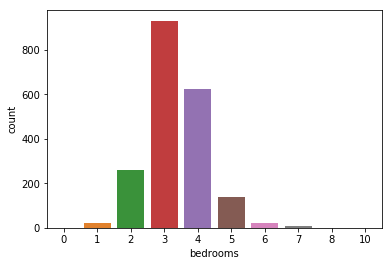

In [8]:
sns.countplot(df['bedrooms'])
plt.show()

# Summarize the relationship among variables

In [9]:
df['date']=pd.to_datetime(df['date'])
df['date']=df['date'].dt.day

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2068000270,5,1400000,5,3.0,3850,14990,1.0,0,0,...,9,2290,1560,1964,0,98004,47.6425,-122.218,3010,15001
1,7732500700,26,832500,4,2.5,3450,35100,2.0,0,0,...,10,3450,0,1987,0,98052,47.7302,-122.106,3110,35894
2,7851990240,17,771150,4,3.5,3950,12320,2.0,0,0,...,10,3950,0,2001,0,98065,47.5414,-121.869,3920,11086
3,3423049269,13,225000,4,1.5,1950,12559,1.5,0,0,...,6,1950,0,1939,0,98188,47.4364,-122.282,1950,9178
4,7852150200,23,389950,3,2.5,1700,6396,2.0,0,0,...,7,1700,0,2003,0,98065,47.5333,-121.870,1700,4444


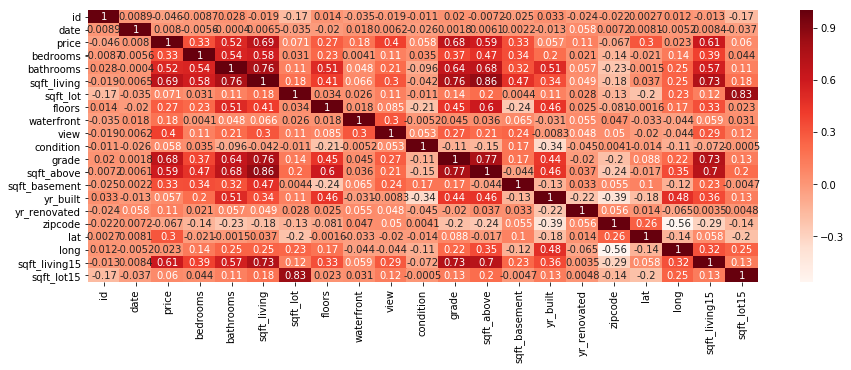

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="Reds")

# 4.Check the defects in data and perform the action

In [12]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

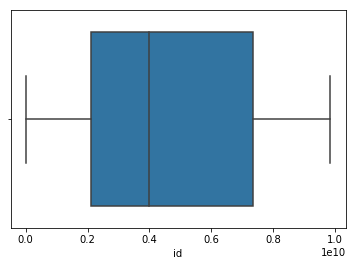

Total outliers in id is 0


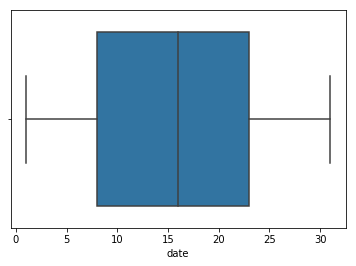

Total outliers in date is 0


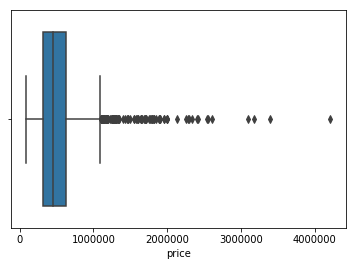

Total outliers in price is 104


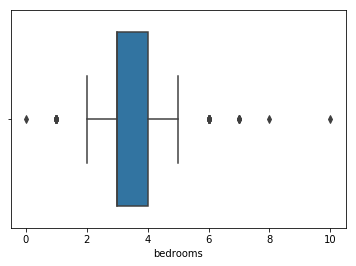

Total outliers in bedrooms is 50


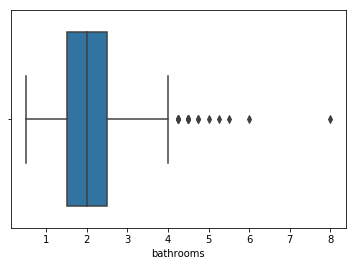

Total outliers in bathrooms is 19


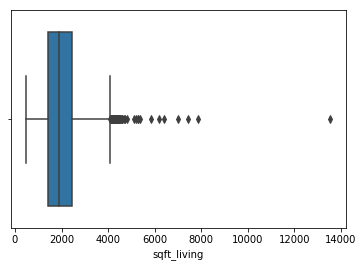

Total outliers in sqft_living is 48


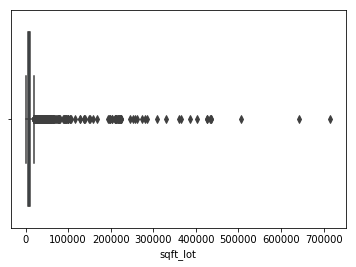

Total outliers in sqft_lot is 250


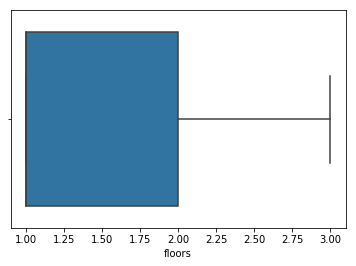

Total outliers in floors is 0


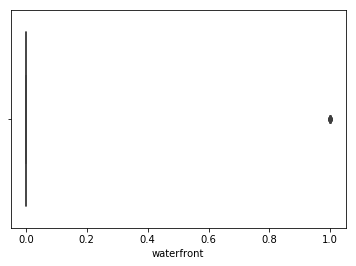

Total outliers in waterfront is 10


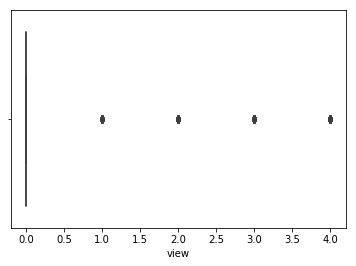

Total outliers in view is 199


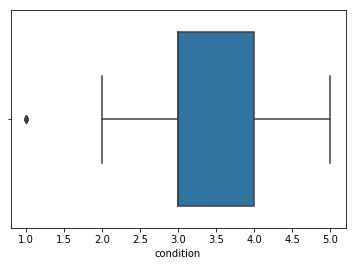

Total outliers in condition is 5


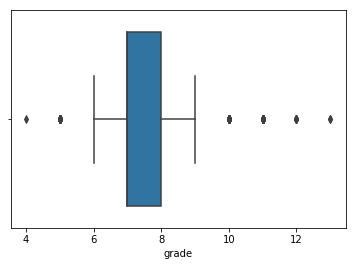

Total outliers in grade is 168


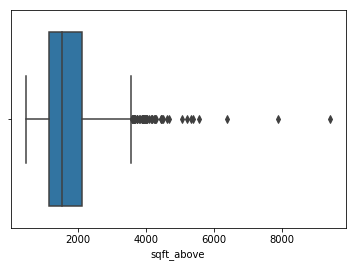

Total outliers in sqft_above is 52


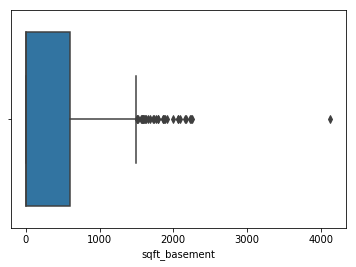

Total outliers in sqft_basement is 33


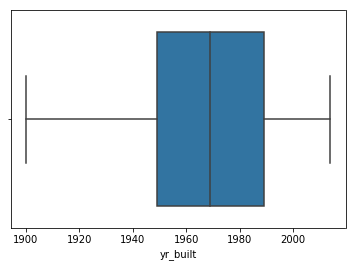

Total outliers in yr_built is 0


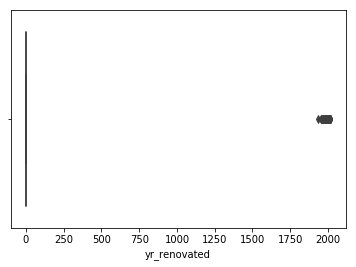

Total outliers in yr_renovated is 85


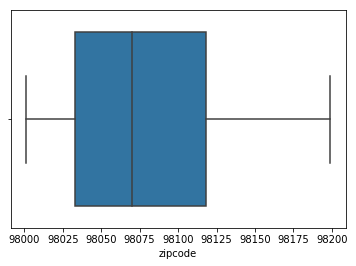

Total outliers in zipcode is 0


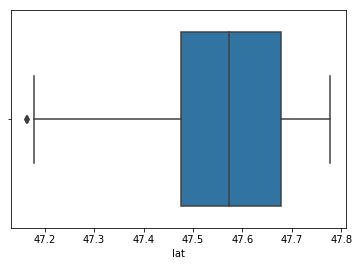

Total outliers in lat is 2


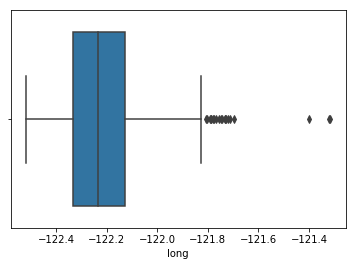

Total outliers in long is 20


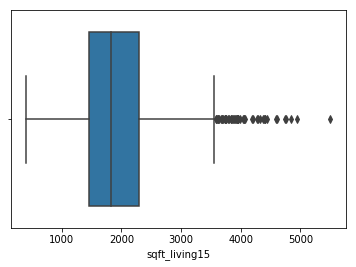

Total outliers in sqft_living15 is 52


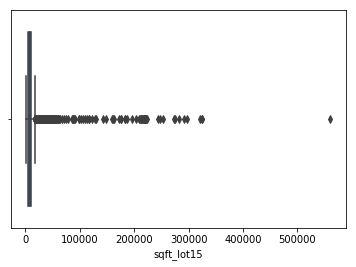

Total outliers in sqft_lot15 is 230


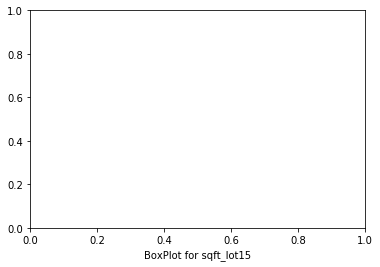

In [14]:
columns_names=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
for i in range(len(columns_names)):
    name=columns_names[i]
    q1=np.quantile(df[name],0.25)
    q3=np.quantile(df[name],0.75)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    sns.boxplot(df[name])
    plt.show()
    s='BoxPlot for'+' '+name
    plt.xlabel(s,fontsize=10)
    length=len(df[(df[name]<ll)|(df[name]>ul)])
    print('Total outliers in',name,'is',length)

# 5.Splitting Data into Train Test Split

In [15]:
X=df[['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=df.price

In [16]:
print(X.shape)
print(y.shape)

(2001, 20)
(2001,)


In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [19]:
## H0:Mean of train = Mean of test
## H1:Mean of train!=Mean of test
## cv=0.05

In [20]:
import scipy.stats as stats

In [22]:
tstat,pval=stats.ttest_ind(y_train,y_test)

In [23]:
stats.norm.isf(0.05/2)

1.9599639845400545

In [24]:
tstat

-1.4078351699338054

In [25]:
if 1.96>tstat>-1.96:
    print('Fail to Reject Null Hypothesis')
else:
    print("Reject Null Hypothesis")

Fail to Reject Null Hypothesis


In [26]:
pval

0.159335368759133

# 6.Fitting a base model

In [27]:
import statsmodels.api as sm

In [28]:
X= sm.add_constant(X) 
model= sm.OLS(y, X).fit()
model.summary()

C:\Users\Shubham\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     242.4
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:15:03   Log-Likelihood:                -27145.
No. Observations:                2001   AIC:                         5.433e+04
Df Residuals:                    1981   BIC:                         5.444e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.148e+07   9.15e+06      1.255      0.210   -6.46e+06    2.94e+07
id            -4.419e-06    1.5e-06     -2.947      0.003   -7.36e-06   -1.48e-06
date           -161.3671    491.741     -0.328      0.743   -1125.751     803.017
bedrooms      -1.983e+04   6018.376     -3.295      0.001   -3.16e+04   -8029.525
bathrooms      3.835e+04   1.04e+04      3.692      0.000     1.8e+04    5.87e+04
sqft_living      85.6820      7.038     12.175      0.000      71.880      99.484
sqft_lot          0.1060      0.162      0.653      0.514      -0.213       0.425
floors        -9477.9284   1.21e+04     -0.783      0.434   -3.32e+04    1.43e+04
waterfront     4.207e+05   6.32e+04      6.652      0.000    2.97e+05    5.45e+05
view           5.851e+04   6005.051      9.744      0.000    4.67e+04    7.03e+04
condition      2.767e+04   6880.240      4.022      0.000    1.42e+04    4.12e+04
grade          9.694e+04   6809.865     14.235      0.000    8.36e+04     1.1e+05
sqft_above       60.4632      7.417      8.152      0.000      45.917      75.010
sqft_basement    25.2115      8.149      3.094      0.002       9.230      41.193
yr_built      -2463.6478    241.584    -10.198      0.000   -2937.433   -1989.863
yr_renovated     34.6037     11.257      3.074      0.002      12.527      56.681
zipcode        -670.6600    102.125     -6.567      0.000    -870.944    -470.376
lat            5.896e+05   3.41e+04     17.291      0.000    5.23e+05    6.56e+05
long          -2.489e+05    4.1e+04     -6.067      0.000   -3.29e+05   -1.68e+05
sqft_living15    54.1034     10.568      5.120      0.000      33.378      74.829
sqft_lot15       -0.2394      0.219     -1.095      0.274      -0.668       0.189
==============================================================================
Omnibus:                     1309.074   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38135.427
Skew:                           2.619   Prob(JB):                         0.00
Kurtosis:                      23.735   Cond. No.                     2.94e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.82e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     166.3
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:15:03   Log-Likelihood:                -19018.
No. Observations:                1400   AIC:                         3.807e+04
Df Residuals:                    1381   BIC:                         3.817e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -2.926e-06   1.84e-06     -1.588      0.113   -6.54e-06    6.89e-07
date           -574.0090    603.259     -0.952      0.342   -1757.412     609.394
bedrooms       -1.86e+04   7453.074     -2.495      0.013   -3.32e+04   -3977.672
bathrooms       3.64e+04    1.3e+04      2.791      0.005    1.08e+04     6.2e+04
sqft_living      84.6736      8.369     10.118      0.000      68.257     101.090
sqft_lot          0.1343      0.189      0.711      0.477      -0.236       0.505
floors        -2.322e+04   1.52e+04     -1.525      0.127   -5.31e+04    6645.633
waterfront     4.929e+05      9e+04      5.479      0.000    3.16e+05    6.69e+05
view           5.967e+04   7483.174      7.974      0.000     4.5e+04    7.44e+04
condition      2.776e+04   8255.018      3.363      0.001    1.16e+04     4.4e+04
grade          9.474e+04   8504.783     11.139      0.000    7.81e+04    1.11e+05
sqft_above       53.6932      9.377      5.726      0.000      35.298      72.088
sqft_basement    30.9805     10.102      3.067      0.002      11.163      50.798
yr_built      -2309.0925    279.892     -8.250      0.000   -2858.151   -1760.034
yr_renovated     38.8745     14.221      2.734      0.006      10.977      66.772
zipcode        -510.4948     66.961     -7.624      0.000    -641.850    -379.139
lat            5.696e+05   4.16e+04     13.692      0.000    4.88e+05    6.51e+05
long          -2.198e+05   4.78e+04     -4.597      0.000   -3.14e+05   -1.26e+05
sqft_living15    64.2054     12.898      4.978      0.000      38.904      89.507
sqft_lot15       -0.2744      0.245     -1.118      0.264      -0.756       0.207
==============================================================================
Omnibus:                     1055.164   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41385.925
Skew:                           3.085   Prob(JB):                         0.00
Kurtosis:                      28.912   Cond. No.                     1.27e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.58e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,j) for j in range(0,(X.shape[1]))]

C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Shubham\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [31]:
pd.DataFrame({'Column_Names':X.columns,'VIF':vif})

,Column_Names,VIF
0,const,0.000000
1,id,1.045901
2,date,1.007429
3,bedrooms,1.657456
4,bathrooms,3.415477
5,sqft_living,inf
6,sqft_lot,3.279648
7,floors,2.053588
8,waterfront,1.109536
9,view,1.312335


# 7.

In [32]:
reg=LinearRegression()

In [33]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
reg.score(X_test,y_test)

0.726862659360723

In [37]:
from sklearn import ensemble

In [38]:
clf=ensemble.GradientBoostingRegressor(n_estimators=400,max_depth=5,min_samples_split=2,
                                      learning_rate=0.1,loss='ls')

In [39]:
clf.fit(X_train,y_train)

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
clf.score(X_test,y_test)

0.8119919523969124

# 8.Summarizing

In [41]:
models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor( random_state=0, n_estimators=300)
]